# NLP Challenge: Twitter Sentiment Analysis

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize
from sklearn.metrics import balanced_accuracy_score
from wordcloud import wordcloud
import re
from nltk.corpus import stopwords
from collections import Counter


In [6]:
# Import the machine learning model of your choice
from sklearn.linear_model import LogisticRegression


# Step 1: Load the Sentiment140 dataset

In [7]:
# Download the dataset from Kaggle and specify the file path
data = pd.read_csv('Resources/training_1600000_processed_noemoticon.csv', encoding='latin1')

In [8]:
data.columns = ["target", "tweet_id", "date", "flag", "username", "raw_text"]

print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data.tail(20)

(1599999, 6)
(1599999, 6)


,target,tweet_id,date,flag,username,raw_text
1599979,4,2193578679,Tue Jun 16 08:38:56 PDT 2009,NO_QUERY,puchal_ek,@myheartandmind jo jen by nemuselo zrovna tÃ© ...
1599980,4,2193578716,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...
1599981,4,2193578739,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...
1599982,4,2193578758,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,xoAurixo,"@oxhot theri tomorrow, drinking coffee, talkin..."
1599983,4,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,You heard it here first -- We're having a girl...
1599984,4,2193578982,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,LISKFEST,"if ur the lead singer in a band, beware fallin..."
1599985,4,2193579087,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,marhgil,@tarayqueen too much ads on my blog.
1599986,4,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get...
1599987,4,2193579191,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,tellman,@Roy_Everitt ha- good job. that's right - we g...
1599988,4,2193579211,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,jazzstixx,@Ms_Hip_Hop im glad ur doing well


# Step 2: Data Preprocessing

In [9]:
data['processed_text'] = data['raw_text'].apply(lambda x: ' '.join(x.lower() for x in str(x).split()))

In [10]:
# Clean the text data, remove special characters, handle missing values, etc.
def process_text(line):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', line)
    words = word_tokenize(re_clean)
    output = [word.lower() for word in words]
    return ' '.join(output)

data["processed_text"] = data["processed_text"].apply(lambda x: process_text(x))

# Step 3: Feature Extraction

In [11]:
# Choose a feature extraction method (e.g., TF-IDF, Gensim, or a pretrained language model) and transform the text data into numerical features.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['processed_text'])
y = data['target']

# Step 4: Model Selection and Training

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a machine learning model (e.g., Logistic Regression) and train it
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 5: Sentiment Analysis

In [15]:
# Perform sentiment analysis on the dataset using your trained model
y_pred = model.predict(X_test)
bas = balanced_accuracy_score(y_test, y_pred)
print(bas)

0.7658774393045331


# Step 6: Visualizations

0.5171908614174772


<Axes: xlabel='target'>

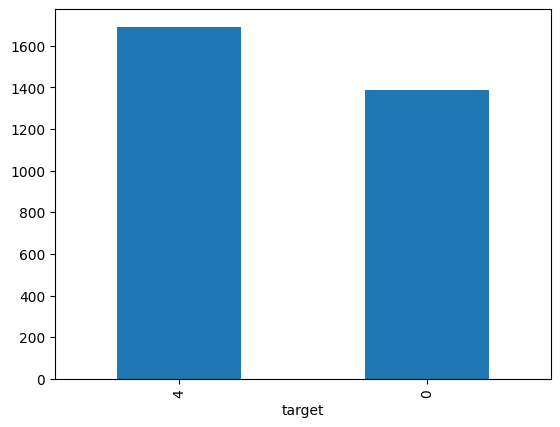

In [54]:
# Select an AI company or product of your choice and collect tweets related to it
# Use your trained model to predict sentiment on these tweets
# Create visualizations to showcase sentiment (e.g., bar charts, word clouds)

# Used a different catergory b/c AI categories didn't seem to have enough entires.
from wordcloud import WordCloud

gun_df = data.loc[data["processed_text"].str.contains('shoot')]
gun_X = tfidf_vectorizer.fit_transform(gun_df["processed_text"])
gun_y = gun_df["target"]

# Use your trained model to predict sentiment on these tweets
y_gun_pred = model.predict(gun_X)
print(balanced_accuracy_score(gun_y, y_gun_pred))


# Example: 
# - Visualize sentiment distribution using seaborn or matplotlib.
# - Create word clouds for positive and negative tweets.
# - Generate a bar chart showing sentiment scores for the chosen company/product.

# Additional Tips:
# - Experiment with hyperparameter tuning to improve model performance.
# - Use cross-validation for a more robust evaluation.
# - Write functions to encapsulate repetitive tasks and improve code organization.

gun_df["target"].value_counts().plot(kind="bar")


In [49]:
# Create visualizations to showcase sentiment (e.g., bar charts, word clouds)
big_string = ' '.join(gun_df["processed_text"].loc[gun_df["target"]==4].astype(str))

def new_process(doc):
    sw = set(stopwords.words('english'))
    words = word_tokenize(doc)
    output = [word.lower() for word in words if word.lower() not in sw]
    return ' '.join(output)
no_stops = new_process(big_string)
big_list = no_stops.split()

big_string_neg = ' '.join(gun_df["processed_text"].loc[gun_df["target"]==0].astype(str))
no_stops_neg = new_process(big_string_neg)
big_list_neg = no_stops_neg.split()





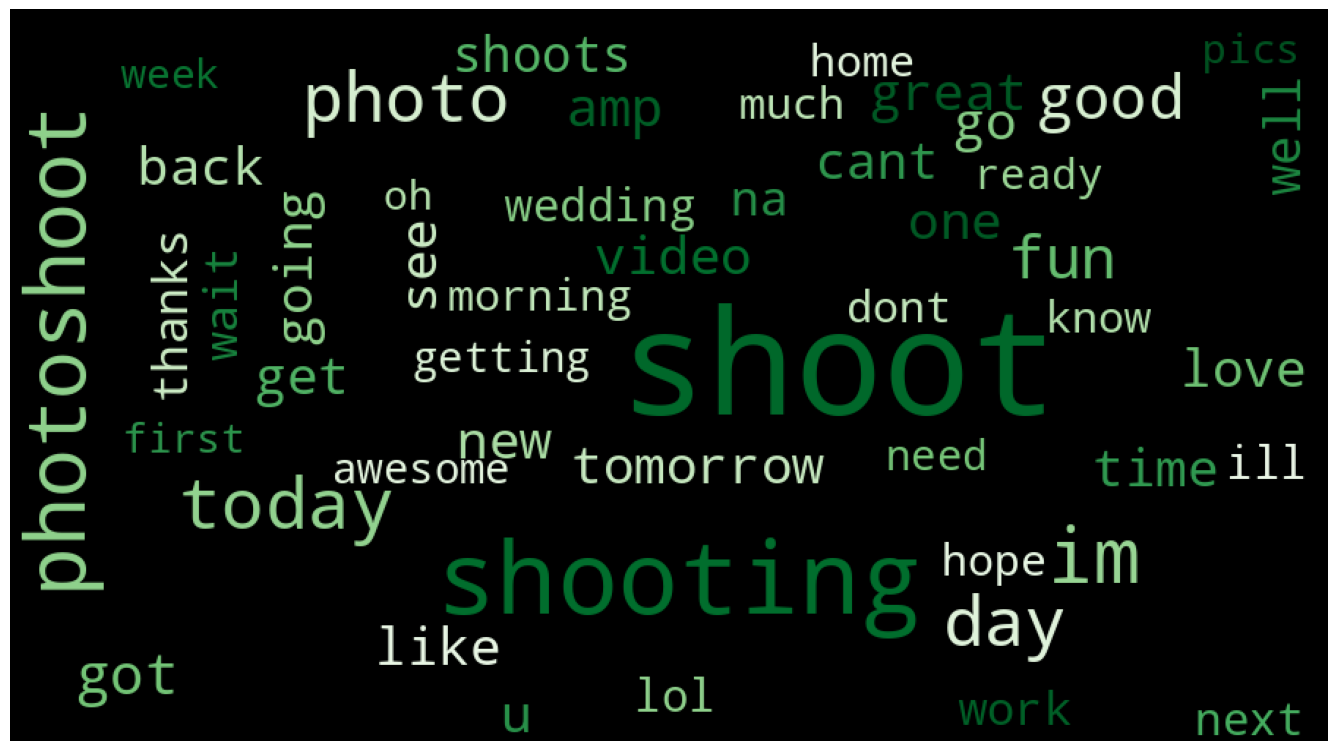

In [51]:
# Positive wc
wordfreq = Counter(big_list)

wordcloud = WordCloud(width=900,
                  height=500,
                  max_words=50,
                  max_font_size=100,
                  relative_scaling=0.5,
                  colormap='Greens',
                  normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, cmap="gray_r")
plt.axis("off")
plt.show()

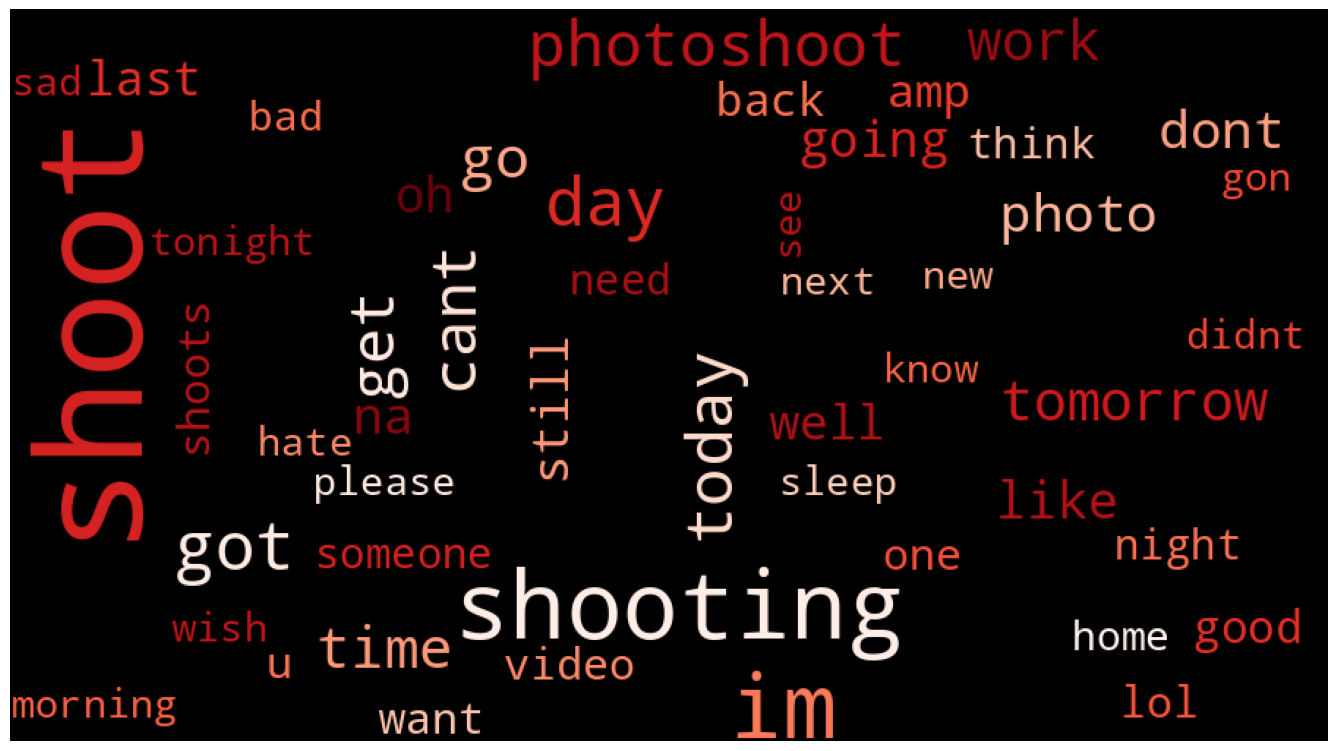

In [53]:
# Negative sentiment wc
wordfreq_neg = Counter(big_list_neg)

wordcloud_neg = WordCloud(width=900,
                  height=500,
                  max_words=50,
                  max_font_size=100,
                  relative_scaling=0.5,
                  colormap='Reds',
                  normalize_plurals=True).generate_from_frequencies(wordfreq_neg)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud_neg, cmap="gray_r")
plt.axis("off")
plt.show()

# Evaluation

In [61]:
# Evaluate your model's performance using metrics like accuracy, precision, recall, and F1-score.

# Example:
# - accuracy = accuracy_score(y_test, y_pred)
# - classification_report(y_test, y_pred)
# - confusion_matrix(y_test, y_pred)

print(confusion_matrix(gun_y, y_gun_pred))

print(classification_report_imbalanced(gun_y, y_gun_pred))


[[ 605  784]
 [ 678 1012]]
                   pre       rec       spe        f1       geo       iba       sup

          0       0.47      0.44      0.60      0.45      0.51      0.26      1389
          4       0.56      0.60      0.44      0.58      0.51      0.27      1690

avg / total       0.52      0.53      0.51      0.52      0.51      0.26      3079



---